# What is Symbolic Computation 

In [1]:
# works for rational numbers
import math
math.sqrt(9)

3.0

In [2]:
math.sqrt(8)

2.8284271247461903

Here we got an approximate result. 2.82842712475 is not the
exact square root of 8 (indeed, the actual square root of 8
cannot be represented by a finite decimal, since it is an
irrational number). If all we cared about was the decimal form
of the square root of 8, we would be done.

But suppose we want to go further. Recall that . We would have
a hard time deducing this from the above result. This is where
symbolic computation comes in. With a symbolic computation system
like SymPy, square roots of numbers that are not perfect squares
are left unevaluated by default

# A More Interesting Example

In [3]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [4]:
expr - 1

x + 2*y - 1

In [5]:
expr - x

2*y

Notice something in the above example. When we typed expr - x, we did
not get x + 2*y - x, but rather just 2*y. The x and the -x automatically
canceled one another. This is similar to how sqrt(8) automatically turned
into 2*sqrt(2) above. This isn’t always the case in SymPy, however:

In [6]:
x*expr

x*(x + 2*y)

# The Power of Symbolic Computation

In [7]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
print("Expanded expression : ", expanded_expr)
print("Factored expression : ", factor(expanded_expr))

Expanded expression :  x**2 + 2*x*y
Factored expression :  x*(x + 2*y)


In [8]:
from sympy import *
x, t, z, nu = symbols('x t z nu')

In [9]:
# This will make all further examples pretty print with unicode characters.
init_printing(use_unicode=True)

In [10]:
diff(sin(x)*exp(x), x)

In [11]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

In [12]:
limit(sin(x)/x, x, 0)

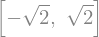

In [13]:
solve(x**2 - 2, x)

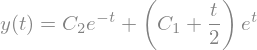

In [14]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

In [17]:
import sympy
import math
# besselj(nu, z).rewrite(jn)

# Latex Output Form

In [18]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

# Gotchas

SymPy uses Python syntax to build expressions. Implicit multiplication (like 3x or 3 x) is not allowed in Python, and thus not allowed in SymPy. To multiply 3 and x, we must type 3*x with the *.

## Symbols :

In [19]:
from sympy import *

In [20]:
x = symbols('x')
x + 1

>>> x + 1
Traceback (most recent call last):
...
NameError: name 'x' is not defined

Oops! What happened here? We tried to use the variable x, but it tells us
that x is not defined. In Python, variables have no meaning until they are
defined. SymPy is no different. Unlike many symbolic manipulation systems
we may have used, in SymPy, variables are not defined automatically. To define
variables, we must use symbols.

In [21]:
a, b = symbols('b a')
a

In [22]:
b

In [23]:
crazy = symbols('unrelated')
crazy + 1

In [24]:
x = symbols('x')
expr = x + 1
x = 2
print(expr)

x + 1


Changing x to 2 had no effect on expr. This is because x = 2 changes
the Python variable x to 2, but has no effect on the SymPy Symbol x,
which was what we used in creating expr. When we created expr, the
Python variable x was a Symbol. After we created, it, we changed the
Python variable x to 2. But expr remains the same. This behavior is
not unique to SymPy. All Python programs work this way: if a variable
is changed, expressions that were already created with that variable
do not change automatically. For example

In [25]:
x = 'abc'
expr = x + 'def'
expr
x = 'ABC'
expr

'abcdef'

In [26]:
# To change the value of a Symbol in an expression, use subs
from sympy import*
x = symbols('x')
expr = x + 1
expr.subs(x, 2)

# Equal signs :


Another very important consequence of the fact that SymPy does not extend Python syntax is that = does not represent equality in SymPy. Rather it is Python variable assignment. This is hard-coded into the Python language, and SymPy makes no attempts to change that.

You may think, however, that ==, which is used for equality testing in Python, is used for SymPy as equality. This is not quite correct either. Let us see what happens when we use ==.

In [27]:
x + 1 == 4

False

In [29]:
# There is a separate object, called Eq, which can
# be used to create symbolic equalities

"""
Instead of treating x + 1 == 4 symbolically, we just
got False. In SymPy, == represents exact structural 
equality testing. This means that a == b means that we
are asking if . We always get a bool as the result of ==.
"""

Eq(x+1,4) # creating symbolic equalities

In [30]:
Eq ( x + 1 , 4 )
print( x+1 == 4 ) # watch out the output: False (Why???)  

False


In [31]:
(x + 1)**2 == x**2 + 2*x + 1

False

It turns out that when using SymPy as a library, having == test for exact structural equality is far more useful than having it represent symbolic equality, or having it test for mathematical equality. 

 We have already seen an alternative to representing equalities symbolically, Eq. To test if two things are equal, it is best to recall the basic fact that if , then . Thus, the best way to check if  is to take  and simplify it, and see if it goes to 0. We will learn later that the function to do this is called simplify. This method is not infallible—in fact, it can be theoretically proven that it is impossible to determine if two symbolic expressions are identically equal in general—but for most common expressions, it works quite well.

In [32]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

In [33]:
c = x**2 - 2*x + 1
simplify(a - c)

# equals :

In [34]:
# There is also a method called equals that
# tests if two expressions are equal by evaluating
# them numerically at random points.

a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

You may have noticed that we have been using ** for exponentiation instead of the standard ^. That’s because SymPy follows Python’s conventions. In Python, ^ represents logical exclusive or. SymPy follows this convention:

In [35]:
from sympy import*
import sympy
y  = sympy.symbols('y')
True ^ False
True ^ True

False

In [36]:
import sympy
x , y  = sympy.symbols('x y')
Xor(x , y)

Finally, a small technical discussion on how SymPy works is in order. When you type something like x + 1, the SymPy Symbol x is added to the Python int 1. Python’s operator rules then allow SymPy to tell Python that SymPy objects know how to be added to Python ints, and so 1 is automatically converted to the SymPy Integer object.

This sort of operator magic happens automatically behind the scenes, and you rarely need to even know that it is happening. However, there is one exception. Whenever you combine a SymPy object and a SymPy object, or a SymPy object and a Python object, you get a SymPy object, but whenever you combine two Python objects, SymPy never comes into play, and so you get a Python object.

In [37]:
type(Integer(1) + 1)


sympy.core.numbers.Integer

In [38]:
type(1 + 1)

int

This is usually not a big deal. Python ints work much the same as SymPy Integers, but there is one important exception: division. In SymPy, the division of two Integers gives a Rational:

In [39]:
Integer(1)/Integer(3)

In [40]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

But in Python / represents either integer division or floating point division, depending on whether you are in Python 2 or Python 3, and depending on whether or not you have run from __future__ import division in Python 2 which is no longer supported from versions above SymPy 1.5.1:

In [41]:
from __future__ import division
1/2

To avoid this, we can construct the rational object explicitly

In [42]:
Rational(1, 2)

This problem also comes up whenever we have a larger symbolic expression with int/int in it. For example:

In [43]:
x + 1/2

This happens because Python first evaluates 1/2 into 0.5, and then that is cast into a SymPy type when it is added to x. Again, we can get around this by explicitly creating a Rational:

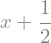

In [44]:
x + Rational(1,2)